# Outline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw
from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum

from neurodsp.plts import plot_power_spectra
from neurodsp.plts.time_series import plot_multi_time_series

from fooof.utils import trim_spectrum

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_77160/38072143.py:11: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.utils import trim_spectrum


In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.methods import *
from apm.core.db import APMDB
from apm.plts.base import plot_dots

In [3]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [4]:
# Simulation settings
n_seconds = 100
fs = 1000

f_range = (0.25, None)

In [5]:
exps = [-3, -2.5, -2, -1.5, -1, -0.5, 0]

In [6]:
times = create_times(n_seconds, fs)

In [7]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '02_sims'

## Simulate Signals

In [8]:
sigs = []
for exp in exps:
    sigs.append(sim_powerlaw(n_seconds, fs, exp, f_range))

In [9]:
cmap = [plt.cm.gist_heat(ind) for ind in np.linspace(0, 1, len(exps) + 2)]

## Plots

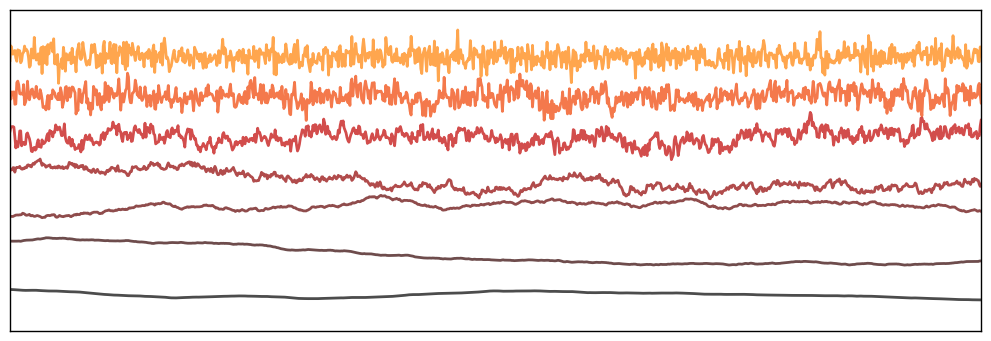

In [10]:
# Plot time series
plot_multi_time_series(times, sigs, colors=cmap, xlim=[0, 1.0], xticks=[],
                       lw=2.0, alpha=0.7, xlabel=None, ylabel=None, figsize=(10, 3.5), 
                       save_fig=SAVE_FIG, file_name='time_series' + EXT, file_path=FIGPATH)

In [11]:
# Compute power spectra for the powerlaw signals 
all_powers = []
for ind, sig in enumerate(sigs):
    freqs, cur_powers = compute_spectrum(sig, fs, nperseg=5*fs, noverlap=fs)
    freqs, cur_powers = trim_spectrum(freqs, cur_powers, [1, 50])    
    all_powers.append(cur_powers / cur_powers[0])

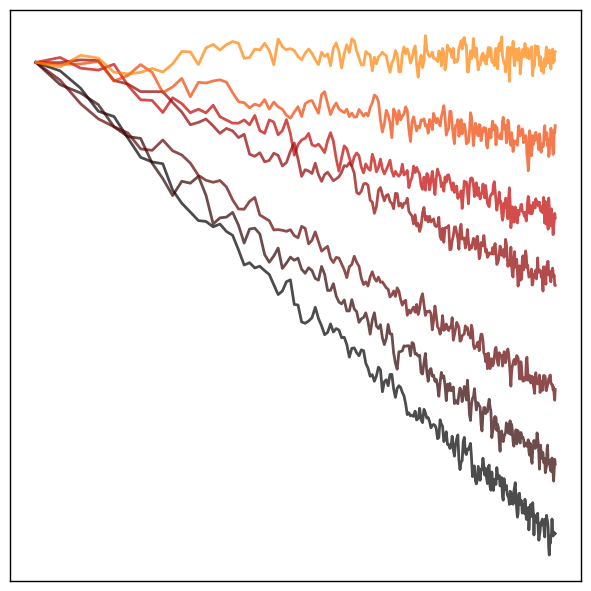

In [12]:
# Plot power spectra of different noise colours
plot_power_spectra(freqs, all_powers, colors=cmap, alpha=0.7, minorticks=False,
                   lw=2, xlabel=None, ylabel=None, xticks=[], yticks=[],
                   save_fig=SAVE_FIG, file_name='power_spectra' + EXT, file_path=FIGPATH)

## Measures

In [13]:
# Define list of measures
measures = ['autocorr', 'fluctuations', 'complexity', 'entropy', 'exponent']

# Define list of titles
titles = {'autocorr' : 'AutoCorrelation', 
          'fluctuations' : 'Fluctuations',
          'complexity' : 'Complexity',
          'entropy' : 'Entropy',
          'exponent' : 'Exponent'}

In [14]:
# Compute measures
results = {measure : np.ones(len(sigs)) * np.nan for measure in measures}
for ind, sig in enumerate(sigs):
    results['autocorr'][ind] = autocorr_decay_time(sig, fs, level=0.1, max_lag=2000, lag_step=1)
    results['fluctuations'][ind] = dfa(sig, fs=fs)
    results['complexity'][ind] = lempelziv(sig)
    results['entropy'][ind] = app_entropy(sig)
    results['exponent'][ind] = specparam(sig, fs=fs)

In [15]:
plt_kwargs = {'color' : cmap[0:7], 's' : 7**2, 'add_corr' : False,
              'xlim' : [-3.35, 0.35], 'xticks' : [], 'yticks' : [],
              'title_fontsize' : 14}

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


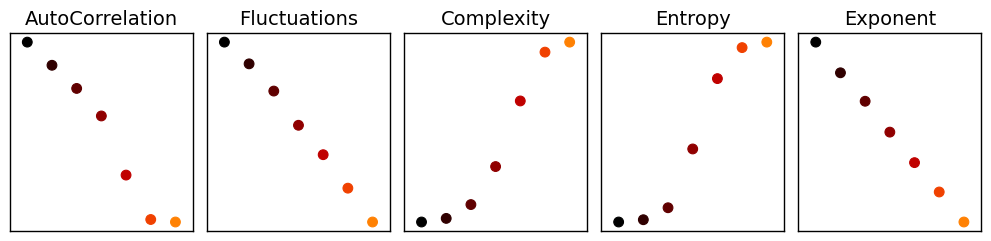

In [16]:
_, axes = plt.subplots(1, 5, figsize=(10, 2.5))
plot_dots(exps, results['autocorr'], title=titles['autocorr'], ax=axes[0], **plt_kwargs)
plot_dots(exps, results['fluctuations'], title=titles['fluctuations'], ax=axes[1], **plt_kwargs)
plot_dots(exps, results['complexity'], title=titles['complexity'], ax=axes[2], **plt_kwargs)
plot_dots(exps, results['entropy'], title=titles['entropy'], ax=axes[3], **plt_kwargs)
plot_dots(exps, results['exponent'], title=titles['exponent'], ax=axes[4], **plt_kwargs)

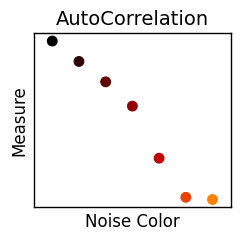

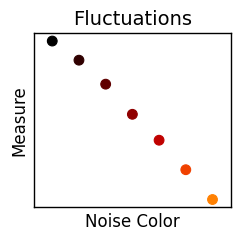

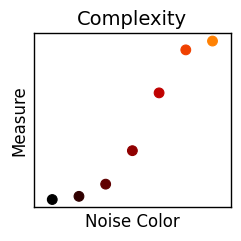

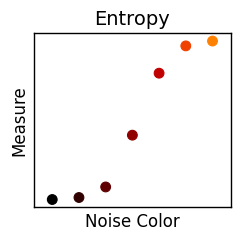

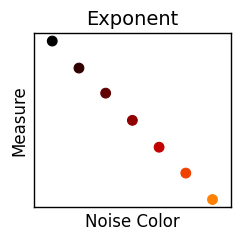

In [17]:
# Save out individual plots
for measure in measures:
    plot_dots(exps, results[measure], title=titles[measure], **plt_kwargs, figsize=(2.5, 2.5),
              xlabel='Noise Color', ylabel='Measure', label_size=12,
              save_fig=SAVE_FIG, file_name='plot_' + measure + EXT, file_path=FIGPATH)

## Text Plot

In [18]:
# Define text plot settings
text_plt_kwargs = {
    'fontdict' : {'fontsize': 16},
    'horizontalalignment' : 'center',
}

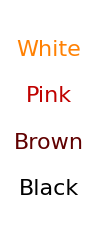

In [19]:
# Plot text labels
_, ax = plt.subplots(figsize=(1, 3))
ax.text(0.5, 0.80, 'White', color=cmap[6], **text_plt_kwargs)
ax.text(0.5, 0.60, 'Pink', color=cmap[4], **text_plt_kwargs)
ax.text(0.5, 0.40, 'Brown', color=cmap[2], **text_plt_kwargs)
ax.text(0.5, 0.20, 'Black', color=cmap[0], **text_plt_kwargs)
ax.axis('off');
if SAVE_FIG: plt.savefig(FIGPATH / ('noise_colors' + EXT))